In [1]:
# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

from src.preprocessing import compute_phases, split_trajectories, filter_trajectories
from src.viz import plot_trajectories
from src.io import load_dataframe, save_dataframe


In [2]:
df_raw = pd.read_csv('../data/raw/copepods_R1_000rpm.csv')
df_raw.head()

,label,x,y,z,u,v,w,frame
0,1,6.815778,30.261433,-11.869450,-0.312718,-3.064886,-1.664252,1065010
1,1,6.812553,30.245701,-11.877195,-0.340858,-3.064333,-2.431181,1065011
2,1,6.809433,30.229555,-11.888418,-0.480265,-3.081435,-2.508502,1065012
3,1,6.806781,30.214354,-11.907193,-0.659068,-2.995298,-2.524871,1065013
4,1,6.803920,30.199192,-11.915321,-0.783594,-2.917105,-2.620490,1065014


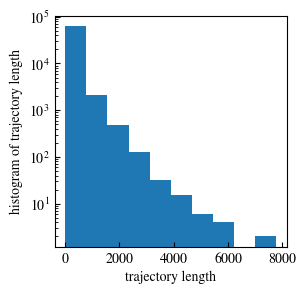

In [3]:
fig,ax = plt.subplots(figsize=(3,3))
ax.hist([group['frame'].values.size for _,group in df_raw.groupby('label')])
ax.set_yscale('log')
ax.set_ylabel('histogram of trajectory length')
ax.set_xlabel('trajectory length')
fig.savefig('../reports/trajectory_length.pdf',transparent=True,bbox_inches='tight')

In the CLI script make_phase.py, we select trajectory of fixed length : 1000 timesteps.

In [ ]:
# Path to raw copepod tracking data
df = pd.read_parquet('../data/interim/phases.parquet')
df.head()


In [ ]:
print(f"{len(df)} rows from {df['label'].nunique()} trajectories")

2190000 rows from 2190 trajectories


In [ ]:
plot_trajectories(df, xcol='x',ycol='y',zcol='z',t_min=30,t_max=60, sample=1,groupby='label',fig_kwargs={"figsize":(4,5)},ax_kwargs={"marker":"o"})

<IPython.core.display.Javascript object>

<Axes3D: title={'center': 'Trajectories'}, xlabel='x', ylabel='y', zlabel='z'>

In [ ]:
fig,ax = plt.subplots(ncols=2)
plot_trajectories(df,ax=ax[0] ,ycol='curvature_angle',xcol='speed', sample=1,groupby='label',fig_kwargs={"figsize":(4,5)},ax_kwargs={"marker":"o"},t_min=30,t_max=60)
plot_trajectories(df,ax=ax[1], ycol='torsion_angle',xcol='speed', sample=1,groupby='label',fig_kwargs={"figsize":(4,5)},ax_kwargs={"marker":"o"},t_min=30,t_max=60)


<IPython.core.display.Javascript object>

<Axes: title={'center': 'Trajectories'}, xlabel='speed', ylabel='torsion_angle'>

Text(0, 0.5, 'absolute torsion angle')

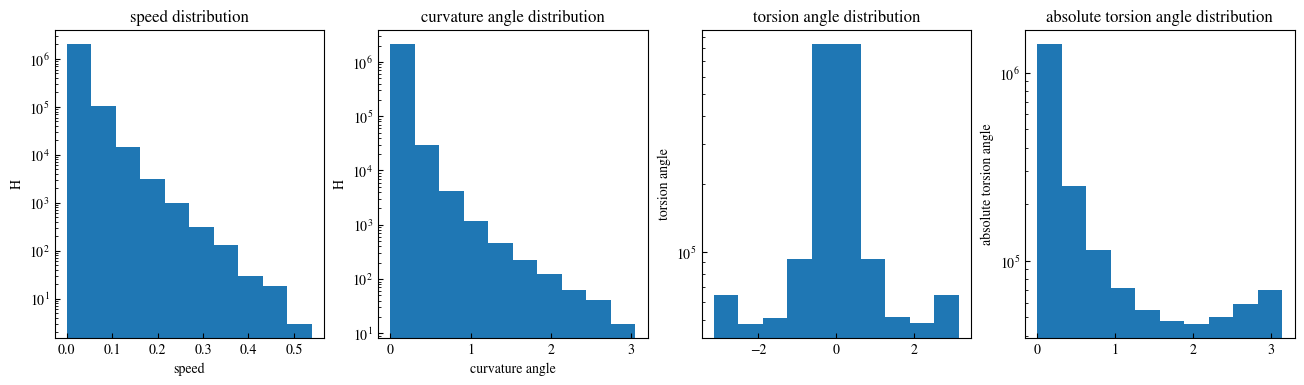

In [ ]:
fig,ax = plt.subplots(ncols=4, figsize= (16,4))
ax[0].hist(df['speed'])
ax[1].hist(df['curvature_angle'])
ax[2].hist(df['torsion_angle'])
ax[3].hist(df['abs_torsion_angle'])

for i in range(4):
    ax[i].set_yscale('log')
    ax[i].set_ylabel('H')

ax[0].set_title('speed distribution')
ax[0].set_xlabel('speed')

ax[1].set_title('curvature angle distribution')
ax[1].set_xlabel('curvature angle')

ax[2].set_title('torsion angle distribution')
ax[2].set_ylabel('torsion angle')

ax[3].set_title('absolute torsion angle distribution')
ax[3].set_ylabel('absolute torsion angle')


Now GPT suggested to distinguish the trajectories as a function of the speed or curvature. We don't do that now.

df_phase = compute_phases(
    df_filtered,
    column_names=("x", "y","z"),  # or ("x", "y", "z") if 3D
    dt=1.0
)

# Assign phase labels
speed_thresh = 0.4
turn_thresh = 1.0
df_phase["phase"] = (
    (df_phase["speed"] > speed_thresh).astype(int) +
    (df_phase["curvature_angle"] > turn_thresh).astype(int)
)
df_phase.head()


df_phase["phase"].value_counts().sort_index().plot(kind="bar", color="tab:blue")
plt.xticks([0, 1, 2], ["Rest", "Swim", "Turn"])
plt.ylabel("Frame count")
plt.title("Phase distribution")


save_dataframe(df_phase, "../data/interim/phases.parquet")
print("Saved to data/interim/phases.parquet")
